## Case Study on Correlation Regression

### Objectives:
A textile company regularly spent money on five advertising companies for their
ads.
1. First of all, check whether there is any `relationship` between the amount spent for advertising through five different companies and profit generated.

2. Build a `regression model` to predict the profit from the given data and comment your findings on it.

3. `Predict the profit generated` by the company, if they wish to spend the following amount for advertisement:
 - Add1(in Thousands): 290
 - Add2(in Thousands): 312
 - Add3(in Thousands): 309
 - Add4(in Thousands): 298
 - Add5(in Thousands): 320

### Importing relevant libraries and modules

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading in the sales data csv file

In [42]:
df = pd.read_csv('Data/Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


### Performing general analysis

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [44]:
df.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [45]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


#### Insights:
 - The dataset appears not to have null values.
 - There are 7 columns and 205 rows in the dataset.
 - Except the `date` column, all columns are of float datatype
 - Somewhat similar amount was spent on each ad company

### 1. Checking for relationship between amount spent on adds and profit generated

In [46]:
df_copy = df.copy(deep=True)

Creating a deep copy of the dataset to create a new table.

In [47]:
df_copy['Total_add_spent'] = df_copy.sum(axis=1) - df_copy['Profit(in Thousands)']
df_copy.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands),Total_add_spent
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065,1068.25
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448,1060.95
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819,1102.90
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665,1147.30
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683,1151.40


Adding a new table, `Total_add_spent` which contains total money spent on adds.

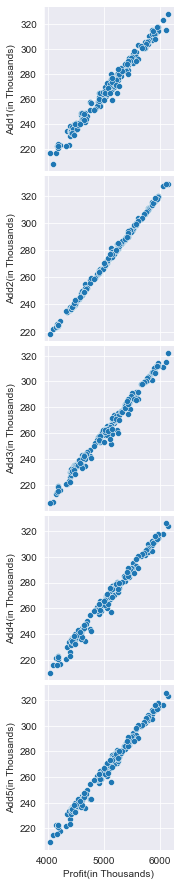

In [48]:
lis1 = ['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)']
sns.pairplot(data = df_copy, y_vars = lis1, x_vars = 'Profit(in Thousands)', kind = 'scatter')
plt.show()

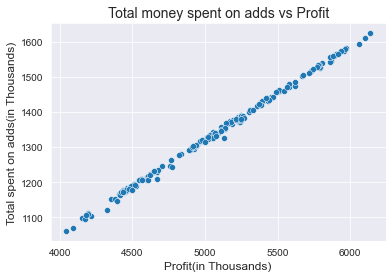

In [49]:
sns.set_style("darkgrid")
sns.scatterplot(x=df_copy['Profit(in Thousands)'], y=df_copy['Total_add_spent'])
plt.title("Total money spent on adds vs Profit", fontsize=14)
plt.ylabel("Total spent on adds(in Thousands)", fontsize=12)
plt.xlabel("Profit(in Thousands)", fontsize=12)
plt.show()

In [32]:
corr_matrix = df_copy[['Profit(in Thousands)', 'Total_add_spent']].corr()

In [33]:
corr_matrix

,Profit(in Thousands),Total_add_spent
Profit(in Thousands),1.000000,0.999054
Total_add_spent,0.999054,1.000000


#### Insights:
 - Using the pair plot on each company separately and on total money spent on ads, we see there is a high positive correlation between money spent on ads and profit.
 - Using correlation analysis, we see that the Pearson's correlation coeffeciant value is `0.991`.
 - Profit increases almost equally in terms of money spent on ads.

### 2. Building a regression model

In [50]:
X = df.drop(['Date', 'Profit(in Thousands)'], axis = 1)
y = df['Profit(in Thousands)']

Taking ad money as X variable and Profit as y variable

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting it into 80% train values and 20% test values

In [54]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

Building the linear regression model.

In [55]:
predictions = model.predict(X_test)
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788])

In [56]:
y_test

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64

In [57]:
mse_value = mean_squared_error(y_test, predictions)
mse_value

5.447286960715061e-25

#### Insights:
 - After building the linear regression model and testing using the test data, the model seems highly accurate.
 - The mean squared error value is so low it is negligible.
 - This must be due to the high correlation between the variables.
 - In the given scenario, the model predicts profit generated accurately.

### 3. Predicting the profit generatd for the given values.

In [58]:
predictions_2 = model.predict([[290, 312, 309, 298, 320]])
predictions_2

array([5820.06])

#### Insights:
 When the money spent on adds are as given, the model predicts the profit generated will be 5820.06(in Thousands).